# <center> Data Munging

## Load Pacakage

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
from sklearn.model_selection import train_test_split

## Load data

In [3]:
DF = pd.read_csv('data/steam_reviews.csv')
DF.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


In [4]:
DF.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


Create a histogram for arecommendation.

In [5]:
fig = px.histogram(DF, x='recommendation')
#fig.show()

Create a function to clean text.

In [6]:
def preprocess(str_arg):
        cleaned_str=re.sub('[^a-z\s]+',' ',str(str_arg), flags=re.IGNORECASE) #every char except alphabets is replaced
        cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
        cleaned_str=cleaned_str.lower() #converting the cleaned string to lower case
        
        return cleaned_str # returning the preprocessed string

Clean text.

In [7]:
DF_len = [None]*len(DF)
for i in range(0, len(DF)):
    DF_len[i] = len(preprocess(DF.iloc[i,6]).split(' '))
DF_len = pd.DataFrame({'length': DF_len})

Create a histogram for review length.

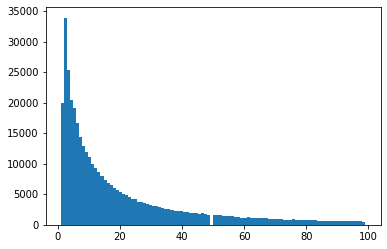

In [8]:
plt.figure()
plt.hist(DF_len[DF_len['length']<100], bins = 100)
plt.savefig('Visualizations/Histogram.png')

There are a lot of reviews are less than 5. We think the review less than 5 is not useful. Hence we only keep the reviews is longer than 5 words.

In [9]:
DF_Clean = DF[DF_len['length']>=5]

Clean the text.

In [10]:
DF_Clean_list = [None] * len(DF_Clean)
for i in range(0, len(DF_Clean)):
    DF_Clean_list[i] = preprocess(DF_Clean.iloc[i,6])

Change to reviews in dataframe to be cleaned reviews.

In [11]:
DF_Clean_DF = pd.DataFrame({'review': DF_Clean_list})
DF_Clean_DF.head()

,review
0,gt played as german reich gt declare war on b...
1,very good game although a bit overpriced in my...
2,out of all the reviews i wrote this one is pro...
3,disclaimer i survivor main i play games for fu...
4,english after playing for more than two years ...


Drop the useless columns.

In [12]:
DF_Clean = DF_Clean.drop('review',axis=1)
DF_Clean = DF_Clean.reset_index(drop=True)

Insert the clean reviews

In [13]:
DF_Clean.insert(7,'review',DF_Clean_DF)
DF_Clean.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,title,review
0,2019-02-10,2,4,578,False,Recommended,Expansion - Hearts of Iron IV: Man the Guns,gt played as german reich gt declare war on b...
1,2019-02-07,0,0,892,False,Recommended,Expansion - Hearts of Iron IV: Man the Guns,very good game although a bit overpriced in my...
2,2018-06-14,126,1086,676,False,Recommended,Dead by Daylight,out of all the reviews i wrote this one is pro...
3,2017-06-20,85,2139,612,False,Recommended,Dead by Daylight,disclaimer i survivor main i play games for fu...
4,2016-12-12,4,55,2694,False,Recommended,Dead by Daylight,english after playing for more than two years ...


Create a histogram for recommendation.

In [14]:
fig = px.histogram(DF_Clean, x='recommendation')
#fig.show()

Set a clean data.

In [15]:
MYDF_Clean = pd.DataFrame({'review':DF_Clean['review'], 'recommendation':DF_Clean['recommendation']})
MYDF_Clean.sample(5)

,review,recommendation
298901,incredibly brutal game in the same sense very ...,Recommended
138011,great game there is alot of things to do in th...,Recommended
282341,shack simulator occus amp holynerd edition,Recommended
42335,game is fun and terribly addictive but as usua...,Not Recommended
331359,still a good game can be a bit of a struggle b...,Recommended


In [16]:
_1 = []
_2 = []
all = []
for i in range(len(MYDF_Clean)):
    if MYDF_Clean.iloc[i,1] == 'Recommended':
        _1.append(MYDF_Clean.iloc[i,0])
    else:
        _2.append(MYDF_Clean.iloc[i,0])
all.append(_1)
all.append(_2)

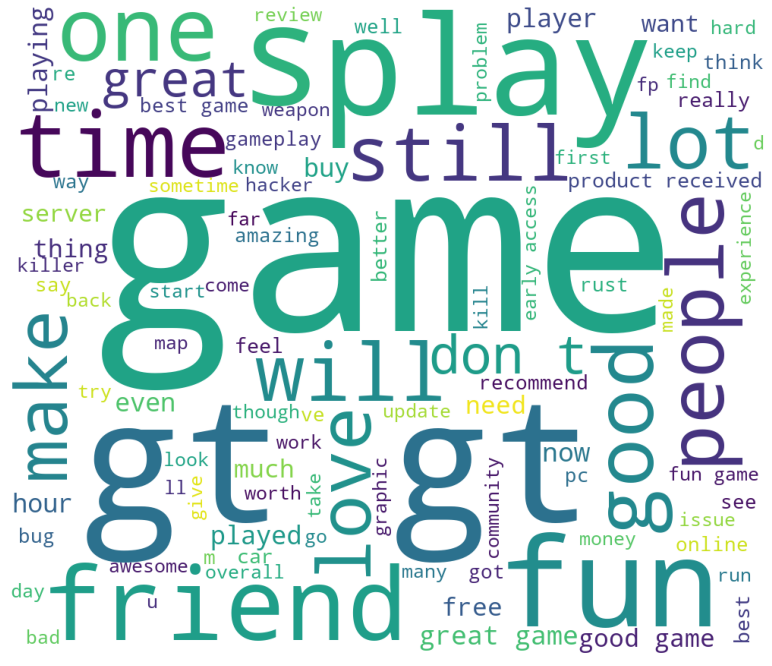

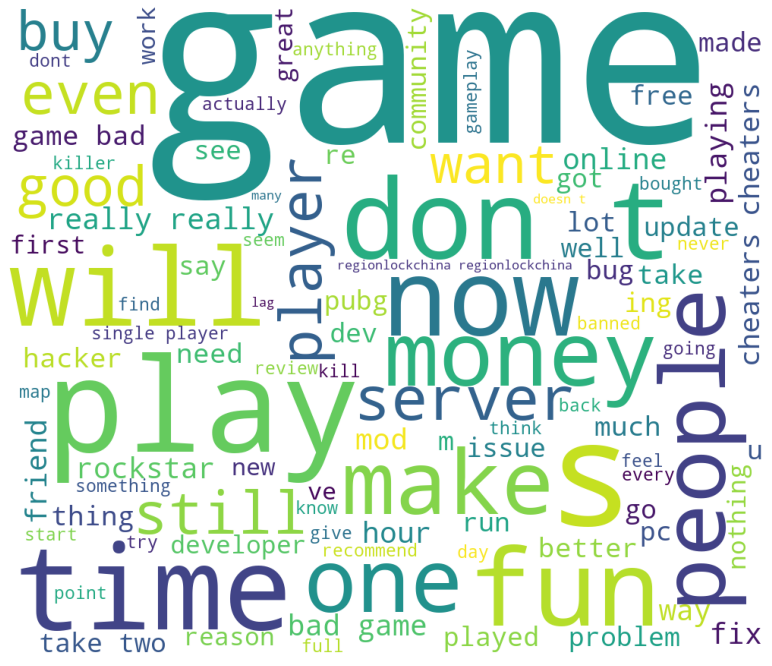

In [17]:
i=1
for list in all:
    text = ''
    rand = random.sample(range(0,len(list)), int(0.1*len(list)))
    for r in rand:
        text=text +' '+ str(list[r])
    #print(text)
    plt.figure(figsize=(18, 12))
    wordcloud = WordCloud(background_color="white", max_words=100, 
                      width=1000, height=860, margin=2).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig('Visualizations/wordcloud'+str(i)+'.jpg')
    i=i+1
    plt.show()

Save clean data to local csv file.

In [18]:
MYDF_Clean.to_csv('Steam_Clean_Data.csv',index=False,sep=',')

## Train and Test Splitting.

Split data based on label recommendation.

In [19]:
Train_reco,Test_reco = train_test_split(MYDF_Clean, test_size = 0.25, stratify=MYDF_Clean['recommendation'], random_state = 580) 

In [20]:
Train_reco.to_csv('data/Train_reco.csv',index=False,sep=',')
Test_reco.to_csv('data/Test_reco.csv',index=False,sep=',')